# The Problem Statement
## Little Inter-class variation
The basset hound and bloodhound share very similar facial characteristics but differ significantly in their color.

Basset


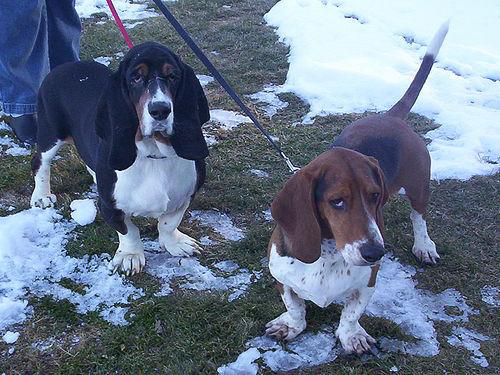

In [4]:
basset = "../input/stanford-dogs-dataset/images/Images/n02088238-basset/n02088238_10028.jpg"
print('Basset')
Image.open(basset)

bloodhound


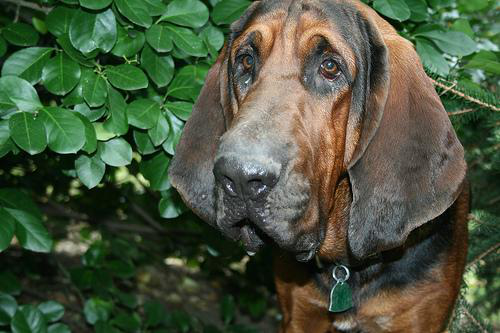

In [5]:
blood_hound = "../input/stanford-dogs-dataset/images/Images/n02088466-bloodhound/n02088466_10083.jpg"
print('bloodhound')
Image.open(blood_hound)

Japanese spaniel and papillion share very similar color but
greatly differ in their facial characteristics.

Japanese spaniel


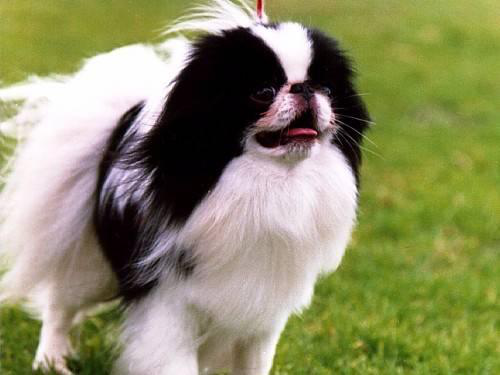

In [6]:
j_spaniel = "../input/stanford-dogs-dataset/images/Images/n02085782-Japanese_spaniel/n02085782_1039.jpg"
print('Japanese spaniel')
Image.open(j_spaniel)

papillion


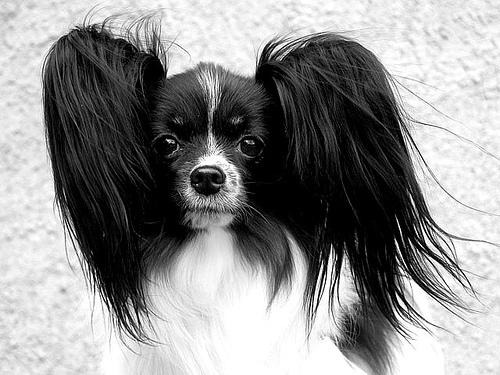

In [7]:
papillion = "../input/stanford-dogs-dataset/images/Images/n02086910-papillon/n02086910_10204.jpg"
print('papillion')
Image.open(papillion)

## Large intra-class variation
Shih-tzu breed has different colors.

Shih-tzu


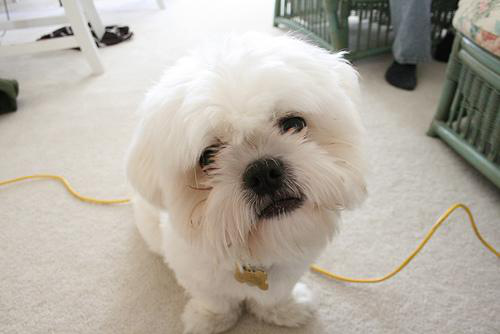

In [8]:
st1 = '../input/stanford-dogs-dataset/images/Images/n02086240-Shih-Tzu/n02086240_11766.jpg'
print('Shih-tzu')
Image.open(st1)

Shih-tzu


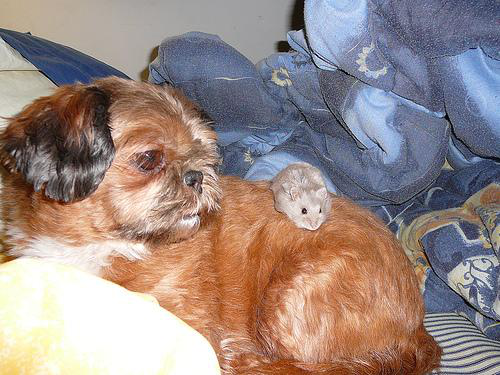

In [9]:
st2 = "../input/stanford-dogs-dataset/images/Images/n02086240-Shih-Tzu/n02086240_110.jpg"
print('Shih-tzu')
Image.open(st2)

# Importing essential libraries

In [10]:
# import all libraries here
import os
import pathlib
import xml.etree.ElementTree as ET
from PIL import Image
import multiprocessing as mp
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
import datetime as dt
from tensorflow.keras import backend as K
#import efficientnet.tfkeras as efn

print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


# Installing & Importing EfficientNetB7

In [11]:
!pip install efficientnet
import efficientnet.tfkeras as efn

     |████████████████████████████████| 50 kB 1.3 MB/s eta 0:00:011
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Declaration of essential constants

In [12]:
# ratio/size of test dataset
TEST_SIZE = 0.2

# random seed
RANDOM_SEED = 28

# target size of image
targetx = 224
targety = 224

# batch size
batch_size = 8

#learning rate
learning_rate =  0.0001

np.random.seed(RANDOM_SEED)

## Experimental Section 1
In this section, we will see if we are getting desired results for each variable

In [13]:
# path to annotation directory
ANNOTATION_DIR = pathlib.Path('../input/stanford-dogs-dataset/annotations/Annotation')

# path to images_directory
IMAGES_DIR = pathlib.Path('../input/stanford-dogs-dataset/images/Images')

# list consisting of paths to all SUBDIRECTORIES of IMAGES_DIR
BREED_DIR = [path for path in IMAGES_DIR.iterdir()]

print(BREED_DIR[0])

../input/stanford-dogs-dataset/images/Images/n02095570-Lakeland_terrier


In [14]:
# list consisting of SUB-DIRECTORY NAMES
BREED_DIR_NAME = [path.name for path in BREED_DIR]
print(BREED_DIR_NAME[0:5])

['n02095570-Lakeland_terrier', 'n02095314-wire-haired_fox_terrier', 'n02086910-papillon', 'n02100877-Irish_setter', 'n02097658-silky_terrier']


In [15]:
# Dictionary that has mappings of breed name to breed code
BREED_CODE_TO_NAME = {breed.split('-')[0]: breed.split('-')[1] for breed in BREED_DIR_NAME}
print(BREED_CODE_TO_NAME)

{'n02095570': 'Lakeland_terrier', 'n02095314': 'wire', 'n02086910': 'papillon', 'n02100877': 'Irish_setter', 'n02097658': 'silky_terrier', 'n02089078': 'black', 'n02091134': 'whippet', 'n02093754': 'Border_terrier', 'n02110627': 'affenpinscher', 'n02092339': 'Weimaraner', 'n02113799': 'standard_poodle', 'n02111277': 'Newfoundland', 'n02099267': 'flat', 'n02091032': 'Italian_greyhound', 'n02102318': 'cocker_spaniel', 'n02086646': 'Blenheim_spaniel', 'n02096585': 'Boston_bull', 'n02092002': 'Scottish_deerhound', 'n02096437': 'Dandie_Dinmont', 'n02104029': 'kuvasz', 'n02097209': 'standard_schnauzer', 'n02096294': 'Australian_terrier', 'n02085782': 'Japanese_spaniel', 'n02111500': 'Great_Pyrenees', 'n02087394': 'Rhodesian_ridgeback', 'n02110063': 'malamute', 'n02107683': 'Bernese_mountain_dog', 'n02091831': 'Saluki', 'n02112706': 'Brabancon_griffon', 'n02094114': 'Norfolk_terrier', 'n02088632': 'bluetick', 'n02104365': 'schipperke', 'n02096051': 'Airedale', 'n02091635': 'otterhound', 'n020

In [16]:
# Dictionary that has mappings of breed name to breed code, reverse of BREED_CODE_TO_NAME
BREED_NAME_TO_CODE = {v: k for k, v in BREED_CODE_TO_NAME.items()}
print(BREED_NAME_TO_CODE)

{'Lakeland_terrier': 'n02095570', 'wire': 'n02095314', 'papillon': 'n02086910', 'Irish_setter': 'n02100877', 'silky_terrier': 'n02097658', 'black': 'n02089078', 'whippet': 'n02091134', 'Border_terrier': 'n02093754', 'affenpinscher': 'n02110627', 'Weimaraner': 'n02092339', 'standard_poodle': 'n02113799', 'Newfoundland': 'n02111277', 'flat': 'n02099267', 'Italian_greyhound': 'n02091032', 'cocker_spaniel': 'n02102318', 'Blenheim_spaniel': 'n02086646', 'Boston_bull': 'n02096585', 'Scottish_deerhound': 'n02092002', 'Dandie_Dinmont': 'n02096437', 'kuvasz': 'n02104029', 'standard_schnauzer': 'n02097209', 'Australian_terrier': 'n02096294', 'Japanese_spaniel': 'n02085782', 'Great_Pyrenees': 'n02111500', 'Rhodesian_ridgeback': 'n02087394', 'malamute': 'n02110063', 'Bernese_mountain_dog': 'n02107683', 'Saluki': 'n02091831', 'Brabancon_griffon': 'n02112706', 'Norfolk_terrier': 'n02094114', 'bluetick': 'n02088632', 'schipperke': 'n02104365', 'Airedale': 'n02096051', 'otterhound': 'n02091635', 'Iris

In [17]:
# assigning label to each breed
# Dictionary that has mappings of label to breed code
BREED_LABEL_TO_CODE = {i: code for i, code in enumerate(BREED_CODE_TO_NAME)}
print(BREED_LABEL_TO_CODE)

{0: 'n02095570', 1: 'n02095314', 2: 'n02086910', 3: 'n02100877', 4: 'n02097658', 5: 'n02089078', 6: 'n02091134', 7: 'n02093754', 8: 'n02110627', 9: 'n02092339', 10: 'n02113799', 11: 'n02111277', 12: 'n02099267', 13: 'n02091032', 14: 'n02102318', 15: 'n02086646', 16: 'n02096585', 17: 'n02092002', 18: 'n02096437', 19: 'n02104029', 20: 'n02097209', 21: 'n02096294', 22: 'n02085782', 23: 'n02111500', 24: 'n02087394', 25: 'n02110063', 26: 'n02107683', 27: 'n02091831', 28: 'n02112706', 29: 'n02094114', 30: 'n02088632', 31: 'n02104365', 32: 'n02096051', 33: 'n02091635', 34: 'n02093991', 35: 'n02102973', 36: 'n02097047', 37: 'n02091244', 38: 'n02087046', 39: 'n02107908', 40: 'n02113978', 41: 'n02098105', 42: 'n02102480', 43: 'n02088466', 44: 'n02102177', 45: 'n02085620', 46: 'n02105855', 47: 'n02105412', 48: 'n02110185', 49: 'n02105505', 50: 'n02105162', 51: 'n02098413', 52: 'n02106166', 53: 'n02093428', 54: 'n02112350', 55: 'n02097130', 56: 'n02105056', 57: 'n02098286', 58: 'n02105641', 59: 'n

In [18]:
# Dictionary that has mappings of breed code to label
BREED_CODE_TO_LABEL = {v: k for k, v in BREED_LABEL_TO_CODE.items()}
print(BREED_CODE_TO_LABEL)

{'n02095570': 0, 'n02095314': 1, 'n02086910': 2, 'n02100877': 3, 'n02097658': 4, 'n02089078': 5, 'n02091134': 6, 'n02093754': 7, 'n02110627': 8, 'n02092339': 9, 'n02113799': 10, 'n02111277': 11, 'n02099267': 12, 'n02091032': 13, 'n02102318': 14, 'n02086646': 15, 'n02096585': 16, 'n02092002': 17, 'n02096437': 18, 'n02104029': 19, 'n02097209': 20, 'n02096294': 21, 'n02085782': 22, 'n02111500': 23, 'n02087394': 24, 'n02110063': 25, 'n02107683': 26, 'n02091831': 27, 'n02112706': 28, 'n02094114': 29, 'n02088632': 30, 'n02104365': 31, 'n02096051': 32, 'n02091635': 33, 'n02093991': 34, 'n02102973': 35, 'n02097047': 36, 'n02091244': 37, 'n02087046': 38, 'n02107908': 39, 'n02113978': 40, 'n02098105': 41, 'n02102480': 42, 'n02088466': 43, 'n02102177': 44, 'n02085620': 45, 'n02105855': 46, 'n02105412': 47, 'n02110185': 48, 'n02105505': 49, 'n02105162': 50, 'n02098413': 51, 'n02106166': 52, 'n02093428': 53, 'n02112350': 54, 'n02097130': 55, 'n02105056': 56, 'n02098286': 57, 'n02105641': 58, 'n0210

In [19]:
# Dictionary that has mappings of breed label to breed name 
BREED_LABEL_TO_NAME = {i: BREED_CODE_TO_NAME[code] for i, code in BREED_LABEL_TO_CODE.items()}
print(BREED_LABEL_TO_NAME)

{0: 'Lakeland_terrier', 1: 'wire', 2: 'papillon', 3: 'Irish_setter', 4: 'silky_terrier', 5: 'black', 6: 'whippet', 7: 'Border_terrier', 8: 'affenpinscher', 9: 'Weimaraner', 10: 'standard_poodle', 11: 'Newfoundland', 12: 'flat', 13: 'Italian_greyhound', 14: 'cocker_spaniel', 15: 'Blenheim_spaniel', 16: 'Boston_bull', 17: 'Scottish_deerhound', 18: 'Dandie_Dinmont', 19: 'kuvasz', 20: 'standard_schnauzer', 21: 'Australian_terrier', 22: 'Japanese_spaniel', 23: 'Great_Pyrenees', 24: 'Rhodesian_ridgeback', 25: 'malamute', 26: 'Bernese_mountain_dog', 27: 'Saluki', 28: 'Brabancon_griffon', 29: 'Norfolk_terrier', 30: 'bluetick', 31: 'schipperke', 32: 'Airedale', 33: 'otterhound', 34: 'Irish_terrier', 35: 'Irish_water_spaniel', 36: 'miniature_schnauzer', 37: 'Ibizan_hound', 38: 'toy_terrier', 39: 'Appenzeller', 40: 'Mexican_hairless', 41: 'soft', 42: 'Sussex_spaniel', 43: 'bloodhound', 44: 'Welsh_springer_spaniel', 45: 'Chihuahua', 46: 'Shetland_sheepdog', 47: 'kelpie', 48: 'Siberian_husky', 49: 

In [20]:
# Dictionary that has mappings of breed name to breed label
BREED_NAME_TO_LABEL = {v: k for k, v in BREED_LABEL_TO_NAME.items()}
print(BREED_NAME_TO_LABEL)

{'Lakeland_terrier': 0, 'wire': 1, 'papillon': 2, 'Irish_setter': 3, 'silky_terrier': 4, 'black': 5, 'whippet': 6, 'Border_terrier': 7, 'affenpinscher': 8, 'Weimaraner': 9, 'standard_poodle': 10, 'Newfoundland': 11, 'flat': 12, 'Italian_greyhound': 13, 'cocker_spaniel': 14, 'Blenheim_spaniel': 15, 'Boston_bull': 16, 'Scottish_deerhound': 17, 'Dandie_Dinmont': 18, 'kuvasz': 19, 'standard_schnauzer': 20, 'Australian_terrier': 21, 'Japanese_spaniel': 22, 'Great_Pyrenees': 23, 'Rhodesian_ridgeback': 24, 'malamute': 25, 'Bernese_mountain_dog': 26, 'Saluki': 27, 'Brabancon_griffon': 28, 'Norfolk_terrier': 29, 'bluetick': 30, 'schipperke': 31, 'Airedale': 32, 'otterhound': 33, 'Irish_terrier': 34, 'Irish_water_spaniel': 35, 'miniature_schnauzer': 36, 'Ibizan_hound': 37, 'toy_terrier': 38, 'Appenzeller': 39, 'Mexican_hairless': 40, 'soft': 41, 'Sussex_spaniel': 42, 'bloodhound': 43, 'Welsh_springer_spaniel': 44, 'Chihuahua': 45, 'Shetland_sheepdog': 46, 'kelpie': 47, 'Siberian_husky': 48, 'kom

# Accessing and Organising the dataset

## Compilation of Experimental Section 1

In [21]:
# path to annotation directory
ANNOTATION_DIR = pathlib.Path('../input/stanford-dogs-dataset/annotations/Annotation')

# path to images_directory
IMAGES_DIR = pathlib.Path('../input/stanford-dogs-dataset/images/Images')

# list consisting of paths to all SUB-DIRECTORIES of IMAGES_DIR
BREED_DIR = [path for path in IMAGES_DIR.iterdir()]

# list consisting of SUB-DIRECTORY NAMES
BREED_DIR_NAME = [path.name for path in BREED_DIR]

# Dictionary that has mappings of breed code to breed name
BREED_CODE_TO_NAME = {breed.split('-')[0]: breed.split('-')[1] for breed in BREED_DIR_NAME}

# Dictionary that has mappings of breed name to breed code, reverse of BREED_CODE_TO_NAME
BREED_NAME_TO_CODE = {v: k for k, v in BREED_CODE_TO_NAME.items()}

#### Assigning label to each breed

# Dictionary that has mappings of label to breed code
BREED_LABEL_TO_CODE = {i: code for i, code in enumerate(BREED_CODE_TO_NAME)}

# Dictionary that has mappings of breed code to label
BREED_CODE_TO_LABEL = {v: k for k, v in BREED_LABEL_TO_CODE.items()}

# Dictionary that has mappings of breed label to breed name 
BREED_LABEL_TO_NAME = {i: BREED_CODE_TO_NAME[code] for i, code in BREED_LABEL_TO_CODE.items()}

# Dictionary that has mappings of breed name to breed label
BREED_NAME_TO_LABEL = {v: k for k, v in BREED_LABEL_TO_NAME.items()}

## Experimental section 2

In [22]:
# Function that gets the file paths of ALL IMAGES IN THE GIVEN DIRECTORY OF THE GIVEN FILE TYPE
def get_all_file_path(directory, file_pattern=''):
    paths = list(f for f in directory.rglob('**/*{}'.format(file_pattern)) if f.is_file())
    return sorted(paths,key=str)

# List that contains file paths to all the images 
all_image_paths = get_all_file_path(IMAGES_DIR, '.jpg') # PosixPath

# number of images
print(len(all_image_paths))

# how does this list look like?
print(all_image_paths[0])

20580
../input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_10074.jpg


In [23]:
# Function that returns path to the sub-directory of the given label 
def path_to_label(path):
    code = path.stem.split('_')[0]
    return BREED_CODE_TO_LABEL[code]

# List that contains LABELS of all Image file paths
all_image_labels = [path_to_label(path) for path in all_image_paths]

# length of the above list, should be equal to number of images
print(len(all_image_labels))

# how does this list look like?
print(all_image_labels[0:2])

20580
[45, 45]


## Compilation of Experimental Section 2

In [24]:
# Function that returns path to the sub-directory of the given label
def path_to_label(path):
    code = path.stem.split('_')[0]
    return BREED_CODE_TO_LABEL[code]

# Function that gets the file paths of ALL IMAGES IN THE GIVEN DIRECTORY OF THE GIVEN FILE TYPE
def get_all_file_path(directory, file_pattern=''):
    paths = list(f for f in directory.rglob('**/*{}'.format(file_pattern)) if f.is_file())
    return sorted(paths, key=str)

# List that contains file paths to all the images
all_image_paths = get_all_file_path(IMAGES_DIR, '.jpg') # PosixPath

# List that contains LABELS of all Image file paths
all_image_labels = [path_to_label(path) for path in all_image_paths]

assert len(all_image_paths)==len(all_image_labels), 'Numbers of images and labels not match! {}!={}'.format(len(all_image_paths), len(all_image_labels))

In [25]:
# making a text file and entering the labels as per the sequence of the images in the images folder
with open('labels.txt', 'w') as f:
    f.write('\n'.join(BREED_NAME_TO_LABEL))

# Cropping the images as per the annotations

In [26]:
# making a directory to save cropped images

IMAGES_CROPPED_DIR = pathlib.Path('/kaggle/working/images_cropped/')
IMAGES_CROPPED_DIR.mkdir(parents=True, exist_ok=True) 
print('done')

done


## Experimental section 3

In [27]:
path_to_xml = '../input/stanford-dogs-dataset/annotations/Annotation/n02085620-Chihuahua/n02085620_10074'
tree = ET.parse(path_to_xml)
test1 = tree.findall("object")[0].findall("bndbox")[0].findall('xmin')[0]
print(test1.text)

25


## Compilation of Experimental Section 3

In [28]:
# Function that takes the image path 
# returns annotations tuple (xmin, ymin, xmax, ymax) for that image
def parse_bounding(path):
    # Get annotation path from image path
    path = ANNOTATION_DIR / path.parent.name / path.stem
    
    # Parse boundings
    tree = ET.parse(path)
    bndbox = tree.getroot().findall('object')[0].find('bndbox')
    left = int(bndbox.find('xmin').text)
    right = int(bndbox.find('xmax').text) 
    upper = int(bndbox.find('ymin').text)
    lower = int(bndbox.find('ymax').text) 
    
    return (left, upper, right, lower)

# Function that takes path of the image
# gets the annotation tuple
# opens the image, crops as per annotation tuple
# saves the cropped image in the Cropped images directory
def crop_and_save_image(path, save_dir=IMAGES_CROPPED_DIR):
    box = parse_bounding(path)
    
    image = Image.open(path)
    image_cropped = image.crop(box)
    image_cropped = image_cropped.convert('RGB')
    image_cropped.save(save_dir / path.name)

In [29]:
%%time
# Using multiprocessing library to fasten the process of cropping the images 


try:
    pool = mp.Pool(processes=mp.cpu_count())
    pool.map(crop_and_save_image, all_image_paths)
except Exception as e:
    print(e)
finally:
    pool.close()

CPU times: user 197 ms, sys: 62.7 ms, total: 260 ms
Wall time: 4min 1s


In [30]:
# List that has file path to all cropped images
all_image_cropped_paths = get_all_file_path(IMAGES_CROPPED_DIR, '.jpg') # PosixPath

# List that has labels to all images
all_image_cropped_labels = [path_to_label(path) for path in all_image_cropped_paths] # [0,1,2,...]

assert len(all_image_paths)==len(all_image_cropped_paths), 'Numbers of images and cropped images not match! {}!={}'.format(len(all_image_paths), len(all_image_cropped_paths))

In [31]:
IMAGE_PATH = all_image_cropped_paths
LABEL = all_image_cropped_labels

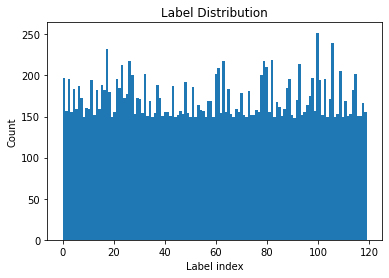

In [32]:
# Plotting the label to see he distribution of labels in the dataset
_ = plt.hist(LABEL, bins=120)
plt.xlabel('Label index')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

Random dog:  West_Highland_white_terrier


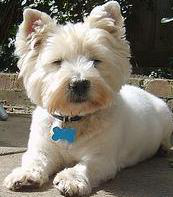

In [33]:
# Ramdomly check a dog image from the dataset
dog = np.random.choice(IMAGE_PATH)
print('Random dog: ', BREED_LABEL_TO_NAME[path_to_label(dog)])
Image.open(dog)

# Splitting data into training and test set

In [34]:
x_train, x_test, y_train, y_test = train_test_split(IMAGE_PATH, 
                                                    LABEL,
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_SEED,
                                                    shuffle=True,
                                                    stratify=LABEL)

print('Train data: ', len(x_train))
print('Test data: ', len(x_test))

Train data:  16464
Test data:  4116


In [35]:
# List of breed names
classes = BREED_NAME_TO_CODE.keys()

# Making a training directory
TRAIN_DIR = pathlib.Path('/kaggle/working/train_dir/')
TRAIN_DIR.mkdir(parents=True, exist_ok=True)

# Making a validation directory
VALIDATION_DIR = pathlib.Path('/kaggle/working/val_dir/')
VALIDATION_DIR.mkdir(parents=True, exist_ok=True)

In [36]:
%%time

# Function that forms SUB-DIRECTORIES OF BREEDS
def make_classes_folder(folder_path):
    for c in classes:
        path = folder_path / c
        path.mkdir()

# Making appropriate sub-directories in the training folder
make_classes_folder(TRAIN_DIR)

# Making appropriate sub-directories in the training folder
make_classes_folder(VALIDATION_DIR)

CPU times: user 2.73 ms, sys: 7.16 ms, total: 9.89 ms
Wall time: 9.86 ms


In [37]:
%%time
# Function that copies images from an array to given folder path
def copy_img_to_folder(path_array,folder_path):
    for img_path in path_array:
        code_to_label = BREED_CODE_TO_NAME.get(img_path.stem.split('_')[0])
        image = Image.open(img_path)
        image.save(folder_path / code_to_label / img_path.name)

# copying images of x_train to training directory
copy_img_to_folder(x_train,TRAIN_DIR)

# copying images of x_test to validation directory
copy_img_to_folder(x_test,VALIDATION_DIR)

CPU times: user 3min 22s, sys: 2.04 s, total: 3min 24s
Wall time: 3min 26s


# Pushing data into image data generators

In [38]:
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=[0.9,1.1],
        horizontal_flip=True,
        fill_mode = 'nearest',
        validation_split=TEST_SIZE
)

train_generator = datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=RANDOM_SEED,
        subset="training"
)


test_generator = datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(targetx, targety),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        seed=RANDOM_SEED,
        subset="validation"
)

Found 13211 images belonging to 120 classes.
Found 784 images belonging to 120 classes.


# Defining essential Callbacks

In [39]:
# callback that saves the best model weights based on best validation accuracy at the end of epoch
checkpoint = ModelCheckpoint('dog_breed_classifier.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='auto',
                             save_weights_only=False,
                             period=1)

# at the end of every epoch, function preints the epoch number and the learning rate
def epoch_end(epoch, logs):
    message = "End of epoch "+str(epoch)+". Learning rate: "+str(K.eval(model.optimizer.lr))
    os.system('echo '+message)

# at the begining of the epoch, function prints the learning rate
def epoch_begin(epoch, logs):
    print("Learning rate: ", K.eval(model.optimizer.lr))

def train_begin(logs):
    os.system("echo Beginning training")

# Stops training when a validation accuracy has stopped improving
earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=.0001,
                          patience=20,
                          verbose=1,
                          mode='auto',
                          baseline=None,
                          restore_best_weights=True)

# Reduce learning rate when a validation accuracy has stopped improving
reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=np.sqrt(.1),
                             patience=5,
                             verbose=1,
                             mode='auto',
                             min_delta=.0001,
                             cooldown=0,
                             min_lr=0.0000001)

# Callback to implement custom callbacks written above, on-the-fly
lambdacb = LambdaCallback(on_epoch_begin=epoch_begin,
                          on_epoch_end=epoch_end,
                          on_batch_begin=None,
                          on_batch_end=None,
                          on_train_begin=train_begin,
                          on_train_end=None)

# Modelling

In [40]:
%%time

# creating the base model
base_model = efn.EfficientNetB7(include_top=False, weights='imagenet', input_shape=(targetx,targety,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(classes), activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)
model = Model(inputs=base_model.input, outputs=predictions)

258441216/258434480 [==============================] - 3s 0us/step
CPU times: user 12.6 s, sys: 1.75 s, total: 14.4 s
Wall time: 18.4 s


# Compilation of Model

In [41]:
%%time
optimizer = Adam(lr=learning_rate)
loss = "categorical_crossentropy"
e=40

# making all layers trainable
for layer in model.layers:
    layer.trainable = True

# compiling the model with adam optimizer and loss function for categorical data
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

#model.summary()

# running the model
params = model.fit_generator(generator=train_generator, 
                                steps_per_epoch=len(train_generator)//batch_size, 
                                validation_data=test_generator, 
                                validation_steps=len(test_generator)//batch_size,
                                epochs=e,
                                callbacks=[reducelr,earlystop, lambdacb, checkpoint])

Learning rate:  1e-04
Epoch 1/40
206/206 [==============================] - ETA: 0s - loss: 4.6247 - accuracy: 0.0570
Epoch 00001: val_accuracy improved from -inf to 0.33333, saving model to dog_breed_classifier.h5
206/206 [==============================] - 84s 408ms/step - loss: 4.6247 - accuracy: 0.0570 - val_loss: 4.2714 - val_accuracy: 0.3333 - lr: 1.0000e-04
Learning rate:  1e-04
Epoch 2/40
206/206 [==============================] - ETA: 0s - loss: 3.5396 - accuracy: 0.2702
Epoch 00002: val_accuracy improved from 0.33333 to 0.61458, saving model to dog_breed_classifier.h5
206/206 [==============================] - 79s 385ms/step - loss: 3.5396 - accuracy: 0.2702 - val_loss: 2.7630 - val_accuracy: 0.6146 - lr: 1.0000e-04
Learning rate:  1e-04
Epoch 3/40
206/206 [==============================] - ETA: 0s - loss: 2.4840 - accuracy: 0.4150
Epoch 00003: val_accuracy improved from 0.61458 to 0.75000, saving model to dog_breed_classifier.h5
206/206 [==============================] - 79s 

Learning rate:  9.999999e-06
Epoch 25/40
206/206 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.8095
Epoch 00025: ReduceLROnPlateau reducing learning rate to 3.162277292675049e-06.

Epoch 00025: val_accuracy did not improve from 0.89583
206/206 [==============================] - 74s 362ms/step - loss: 0.6815 - accuracy: 0.8095 - val_loss: 0.3850 - val_accuracy: 0.8542 - lr: 1.0000e-05
Learning rate:  3.1622774e-06
Epoch 26/40
206/206 [==============================] - ETA: 0s - loss: 0.6398 - accuracy: 0.8284
Epoch 00026: val_accuracy did not improve from 0.89583
206/206 [==============================] - 75s 365ms/step - loss: 0.6398 - accuracy: 0.8284 - val_loss: 0.3439 - val_accuracy: 0.8854 - lr: 3.1623e-06
Learning rate:  3.1622774e-06
Epoch 27/40
206/206 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.8076
Epoch 00027: val_accuracy did not improve from 0.89583
206/206 [==============================] - 75s 362ms/step - loss: 0.6920

# Plotting the results

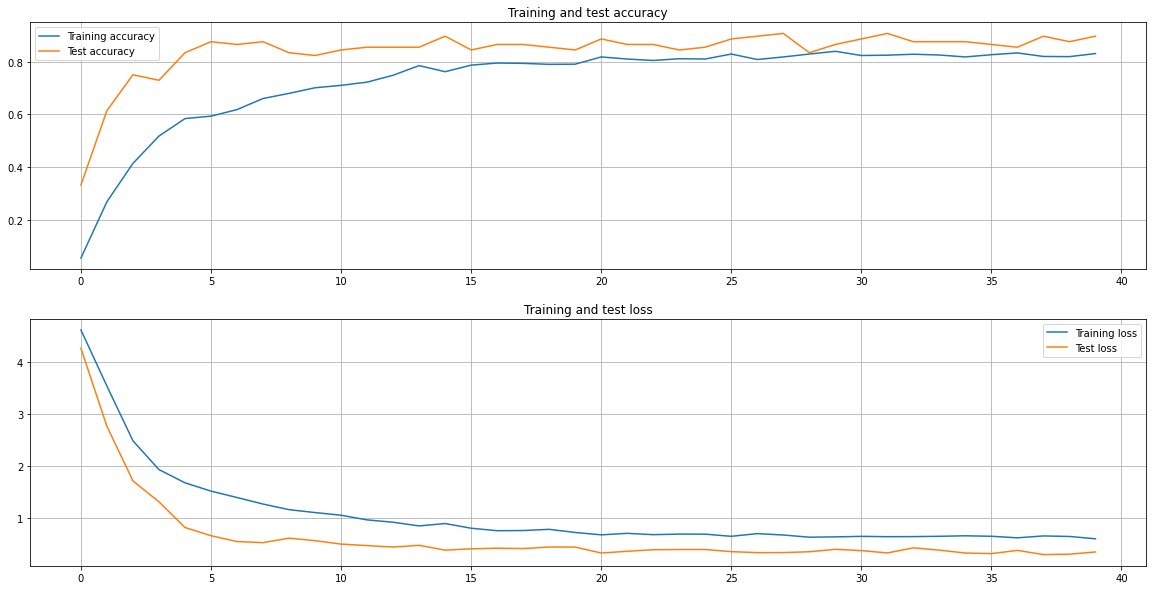

In [42]:
plt.rcParams["figure.figsize"] = [20,10]
plt.subplot(2, 1, 1)
plt.title('Training and test accuracy')
plt.plot(params.epoch, params.history['accuracy'], label='Training accuracy')
plt.plot(params.epoch, params.history['val_accuracy'], label='Test accuracy')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Training and test loss')
plt.plot(params.epoch, params.history['loss'], label='Training loss')
plt.plot(params.epoch, params.history['val_loss'], label='Test loss')
plt.legend()
plt.grid(True)

plt.show()